# Lấy dữ liệu

In [2]:
%store -r X_256
%store -r y_256
%store -r X_test_256
%store -r y_test_256
%store -r feature_names_256

# Thay đổi dữ liệu để phù hợp

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Reshape data
# Data ban đầu X(13166, 20, 128), y(13166)

# Reshape X về dạng 2d => X_2d(263320, 128), giữ nguyên 128 và đó là các đặc trưng
X_2d = X_256.reshape(-1, X_256.shape[-1])
# Reshape y thành y_reshaped(263320) bằng cách lặp mỗi phần tử trong y 20 lần
y_reshaped = np.repeat(y_256, 20)

# Dùng hàm mutual_info_regression
# để đánh giá điểm cho các feature

In [6]:
# Compute information gain for each feature
info_gain = mutual_info_regression(X_2d, y_reshaped)

# Sắp xếp và lấy index của top k phần tử tốt nhất

In [35]:
# Sort the features based on information gain in descending order
sorted_features_indices = np.argsort(info_gain)[::-1]

# Select the top k features (adjust k as needed)
k = 128
selected_features_indices = sorted_features_indices[:k]

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(feature_names_256)):
    feature_scores[feature_names_256[i]] = info_gain[i]


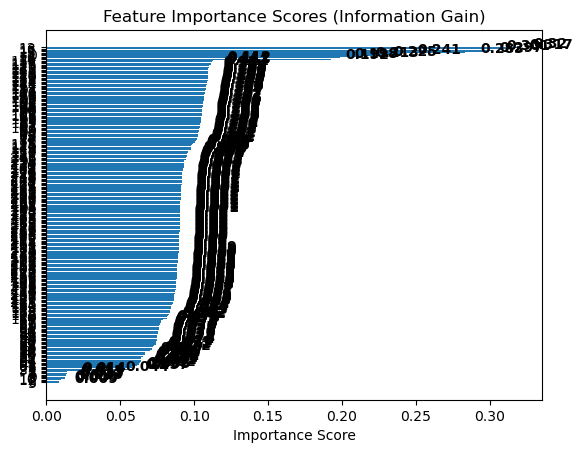

In [58]:
# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

In [9]:
selected_X = X_256[:,:,selected_features_indices]
selected_X_test = X_test_256[:,:,selected_features_indices]

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Khởi tạo mô hình
model = keras.Sequential()

# Thêm lớp Convolutional Layer với 32 bộ lọc kích thước 5x5 và hàm kích hoạt ReLU
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(20, k, 1), padding='same'))

# Thêm lớp Convolutional Layer với 32 bộ lọc kích thước 5x5 và hàm kích hoạt ReLU
model.add(layers.Conv2D(32, (5,5), activation='relu', padding='same'))

# Thêm lớp Max Pooling 2D để giảm kích thước đầu vào đi 2 lần
model.add(layers.MaxPooling2D((2, 2)))

# Thêm lớp Dropout để giảm hiện tượng overfitting
model.add(layers.Dropout(0.5))

# Thêm lớp Convolutional Layer với 64 bộ lọc kích thước 3x3 và hàm kích hoạt ReLU
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))

# Thêm lớp Convolutional Layer với 64 bộ lọc kích thước 3x3 và hàm kích hoạt ReLU
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))

# Thêm lớp Max Pooling 2D để giảm kích thước đầu vào đi 2 lần
model.add(layers.MaxPooling2D((2, 2)))

# Thêm lớp Flatten để làm phẳng đầu ra của lớp trước khi đi vào các lớp fully connected
model.add(layers.Flatten())

# Thêm lớp fully connected (Dense Layer) với 64 units và hàm kích hoạt ReLU
model.add(layers.Dense(64, activation='relu'))

# Thêm lớp Dropout để giảm hiện tượng overfitting
model.add(layers.Dropout(0.5))

# Thêm lớp fully connected (Dense Layer) cuối cùng với số lớp đầu ra phụ thuộc vào bài toán của bạn
model.add(layers.Dense(5, activation='softmax'))

# In thông tin mô hình
model.summary()

# Biên dịch mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 20, 128, 32)         │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 128, 32)         │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 10, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 64, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 64, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 32, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10240)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         655,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 835,941 (3.19 MB)

 Trainable params: 835,941 (3.19 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(selected_X, y_256, epochs=10, batch_size=16)

Epoch 1/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 90s 101ms/step - accuracy: 0.5009 - loss: 1.1720
Epoch 2/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 79s 96ms/step - accuracy: 0.7837 - loss: 0.5850
Epoch 3/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.8228 - loss: 0.5180
Epoch 4/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.8451 - loss: 0.4329
Epoch 5/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 92s 112ms/step - accuracy: 0.8583 - loss: 0.3959
Epoch 6/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 85s 103ms/step - accuracy: 0.8775 - loss: 0.3400
Epoch 7/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 84s 102ms/step - accuracy: 0.8908 - loss: 0.3075
Epoch 8/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 85s 103ms/step - accuracy: 0.8939 - loss: 0.2880
Epoch 9/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 86s 104ms/step - accuracy: 0.9011 - loss: 0.2765
Epoch 10/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9101 - loss: 0.2512


# k = 128

In [27]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(selected_X_test, y_test_256)
print("Độ chính xác trên tập kiểm tra:", test_accuracy)

# Dự đoán các nhãn trên tập kiểm tra
y_pred = model.predict(selected_X_test)

# Chuyển đổi dự đoán thành nhãn dự đoán (lớp dự đoán)
y_pred_classes = np.argmax(y_pred, axis=1)

# Hiển thị ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix, classification_report
confusion = confusion_matrix(y_test_256, y_pred_classes)
print("Ma trận nhầm lẫn:")
print(confusion)

# Hiển thị báo cáo phân loại
class_report = classification_report(y_test_256, y_pred_classes, digits=4)
print("Báo cáo phân loại:")
print(class_report)

412/412 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.9358 - loss: 0.1689
Độ chính xác trên tập kiểm tra: 0.934984028339386
412/412 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step
Ma trận nhầm lẫn:
[[2842    0    0    0    0]
 [   0 1928   27   46   33]
 [   1    7 2707    1   92]
 [   0  265   17 1442   16]
 [   0   20  327    4 3391]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998      2842
           1     0.8685    0.9479    0.9064      2034
           2     0.8795    0.9640    0.9198      2808
           3     0.9658    0.8287    0.8921      1740
           4     0.9601    0.9062    0.9324      3742

    accuracy                         0.9350     13166
   macro avg     0.9347    0.9294    0.9301     13166
weighted avg     0.9380    0.9350    0.9349     13166



In [14]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

def micro_metrics(y_true, y_pred):
  # Calculate micro averages
  micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
      y_true, y_pred.argmax(axis=1), average='micro'
  )
    
  # Macro averages
  macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
      y_true, y_pred.argmax(axis=1), average='macro'
  )
  return {
      'micro_precision': micro_precision,
      'micro_recall': micro_recall,
      'micro_f1': micro_f1,
      'macro_precision': macro_precision,
      'macro_recall': macro_recall,
      'macro_f1': macro_f1
  }

In [15]:
from tabulate import tabulate
micro_results = micro_metrics(y_test_256, y_pred)
# Prepare table data
table_data = [
  ["Micro Precision", micro_results['micro_precision']],
  ["Micro Recall", micro_results['micro_recall']],
  ["Micro F1-score", micro_results['micro_f1']],
  ["Macro Precision", micro_results['macro_precision']],
  ["Macro Recall", micro_results['macro_recall']],
  ["Macro F1-score", micro_results['macro_f1']],
]

# Print the table using tabulate
print(tabulate(table_data, headers=["Metric", "Score"]))

Metric              Score
---------------  --------
Micro Precision  0.934984
Micro Recall     0.934984
Micro F1-score   0.934984
Macro Precision  0.934701
Macro Recall     0.929371
Macro F1-score   0.930097
